In [1]:
import numpy as np

In [2]:
class Perceptron:
    
    def __init__(self, learning_rate=0.01, n_iters=10000):
        # init variables to be used
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # set labels, if y is not binary, labels are the binary version of y
        labels = np.array([1 if i > 0 else 0 for i in y])
        
        for _ in range(self.n_iters):
            
            ################ -- TRAINING
            for idx, x_i in enumerate(X):
                # sum over all (wi*xi)+b
                linear_output = np.dot(x_i, self.weights) + self.bias
                # run the output through your activation function
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (labels[idx] - y_predicted)
                
                self.weights += update * x_i
                self.bias += update
            ################
            
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
        
    def _unit_step_func(self, x):
        # if the linear output is higher than 0, predict label of 1, else predict label of 0
        return np.where(x>0, 1, 0)
    

predictions [1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0]
acc 1.0


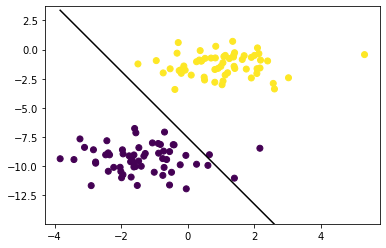

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

p = Perceptron()
p.fit(X_train, y_train)
predictions = p.predict(X_test)
print("predictions", predictions)

def accuracy(y_true, y_pred):
  return np.sum(y_true == y_pred) / len(y_true)

print("acc", accuracy(y_test, predictions))


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()